# Project Overview

# Data Acquisition

In [367]:
# Required Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

from IPython.display import display_html

In [368]:
df = pd.read_csv('Data/obs_species.csv', parse_dates=['observed_on'])

# Analysis

## Overall Native vs Non-Native Species

Number of native plant observations: 4353
Number of non-native plant observations: 3470


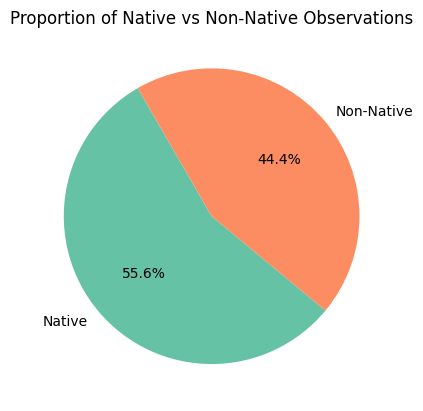

In [369]:
native_counts = df['native'].value_counts().rename({True: 'Native', False: 'Non-Native'})

print(f'Number of native plant observations: {native_counts['Native']}')
print(f'Number of non-native plant observations: {native_counts['Non-Native']}')

colors = ['#66c2a5', '#fc8d62']

plt.pie(native_counts, labels=native_counts.index.astype(str), autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Proportion of Native vs Non-Native Observations");

## Most Common Native and Non-Native Species

In [370]:
native_obs = df[df['native'] == True]
nonnative_obs = df[df['native'] == False]

native_obs_byspecies = native_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame(name='count')
nonnative_obs_byspecies = nonnative_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame(name='count')

top10_native = native_obs_byspecies.nlargest(10, 'count')
top10_nonnative = nonnative_obs_byspecies.nlargest(10, 'count')

df1_html = top10_native.to_html()
df2_html = top10_nonnative.to_html()

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_html}</div><div>{df2_html}</div></div>', raw=True)

,,count
species,common_name,
Ageratina altissima,White snakeroot,119
Verbesina alternifolia,Wingstem,115
Symphyotrichum novae-angliae,New england aster,93
Impatiens capensis,Common jewelweed,90
Solidago caesia,Bluestem goldenrod,86
Asclepias syriaca,Common milkweed,82
Phytolacca americana,American pokeweed,80
Eupatorium serotinum,Late boneset,71
Lobelia cardinalis,Cardinal flower,66


## Most Common Invasive Species

In [371]:
invasive_obs = df[df['invasive'] == True]

invasive_byspecies = invasive_obs.groupby(['species', 'common_name']).size().sort_values(ascending=False).to_frame('count')
display(invasive_byspecies.head(10))

,,count
species,common_name,
Lonicera maackii,Amur honeysuckle,70
Ailanthus altissima,Tree-of-heaven,66
Rosa multiflora,Multiflora rose,41
Lythrum salicaria,Purple loosestrife,35
Dipsacus fullonum,Wild teasel,21
Celastrus orbiculatus,Oriental bittersweet,19
Dipsacus laciniatus,Cutleaf teasel,19
Rhamnus cathartica,Common buckthorn,17
Morus alba,White mulberry,13


## Observations By City

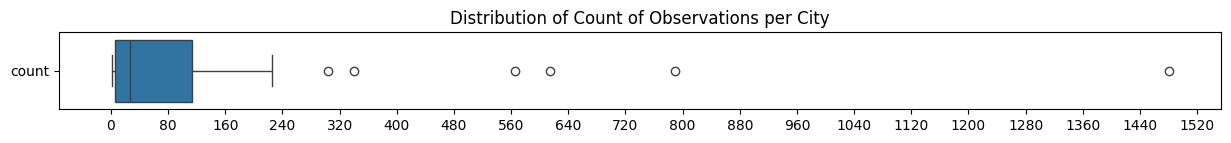

Summary statistics for observations by city


,count
count,77.00
mean,100.79
std,211.64
min,1.00
25%,6.00
50%,27.00
75%,114.00
max,1480.00


In [372]:
city_counts = df.groupby('City').size().to_frame(name='count')

plt.figure(figsize=(15, 1))
sns.boxplot(data=city_counts, orient='h')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=25))
plt.title('Distribution of Count of Observations per City')

plt.show()

print('Summary statistics for observations by city')
display(city_counts.describe().round(2))

### Top 20 Cities for Observations

In [373]:
top20_cities = city_counts.nlargest(20, 'count')
display(top20_cities)

,count
City,
Cleveland,1480
North Olmsted,790
Brecksville,615
Parma,565
Strongsville,340
Walton Hills,304
Cleveland Heights,226
Mayfield,206
Shaker Heights,202


### Number of/Proportion of Native Observations per City

In [374]:

natives_by_city = df.groupby(['City', 'native']).size().to_frame(name='count')

natives_by_city_pivot = natives_by_city.reset_index().pivot_table(index='City', columns='native', values='count', fill_value=0).rename(columns={True: 'Native', False: 'Non-Native'})

merged = natives_by_city_pivot.merge(city_counts, on='City', how='left')

merged['percent_native'] = round((merged['Native'] / merged['count']) * 100,2)

merged = merged[merged['count']> 29]

merged= merged.sort_values(by=['percent_native', 'count'], ascending=False).rename(columns={'count': 'Total'})

display(merged.describe())

display(merged)

,Non-Native,Native,Total,percent_native
count,37.000000,37.000000,37.000000,37.000000
mean,88.162162,111.324324,199.486486,54.955405
std,141.028467,144.086597,274.236072,11.547920
min,9.000000,13.000000,30.000000,26.400000
25%,26.000000,31.000000,62.000000,47.260000
50%,54.000000,54.000000,114.000000,54.390000
75%,77.000000,104.000000,201.000000,63.080000
max,843.000000,637.000000,1480.000000,78.160000


,Non-Native,Native,Total,percent_native
City,,,,
Mayfield,45.0,161.0,206,78.16
Bratenahl,9.0,24.0,33,72.73
Strongsville,101.0,239.0,340,70.29
Brook Park,63.0,138.0,201,68.66
North Olmsted,249.0,541.0,790,68.48
Brecksville,202.0,413.0,615,67.15
Bentleyville,60.0,118.0,178,66.29
Parma Heights,21.0,41.0,62,66.13
Walton Hills,106.0,198.0,304,65.13


### Cities With the Most Invasive Species

In [375]:
invasive_bycity =invasive_obs.groupby('City').size().sort_values(ascending=False).to_frame('count')
invasive_bycity['pct'] = round((invasive_bycity['count'] / merged['Total']) * 100, 2)

display(invasive_bycity.head(10))

,count,pct
City,,
Cleveland,102,6.89
Brecksville,35,5.69
Valley View,17,14.91
North Olmsted,16,2.03
Parma,15,2.65
Shaker Heights,12,5.94
Cleveland Heights,12,5.31
Walton Hills,10,3.29
Middleburg Heights,10,5.88


## Number of Observations Per Month

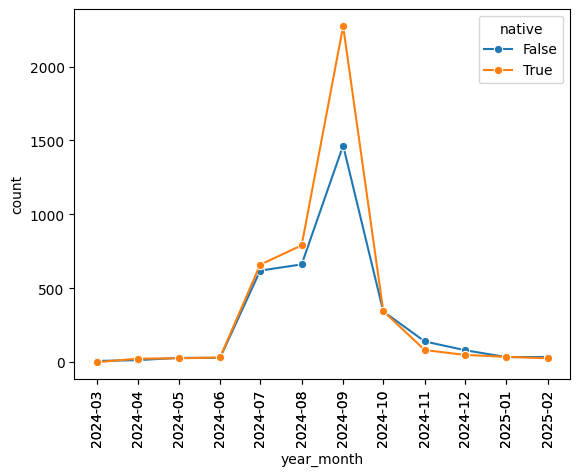

In [376]:
df['year_month'] = df['observed_on'].dt.to_period('M').dt.to_timestamp()

monthly_counts = df.groupby(['year_month', 'native']).size().reset_index(name='count')

sns.lineplot(data=monthly_counts, x='year_month', y='count', hue='native', marker='o')
plt.xticks(ticks=monthly_counts['year_month'], labels=monthly_counts['year_month'].dt.strftime('%Y-%m'), rotation=90)
plt.show()

## Observation Grade

In [377]:
by_grade = df.groupby('quality_grade')['id'].count()
by_grade_native = df.groupby(['native', 'quality_grade'])['id'].count()

display(by_grade.to_frame('count'))
display(by_grade_native.to_frame('count'))

pct_research = round(by_grade.loc['research'] / len(df) * 100, 2)
pct_native_research = by_grade_native.loc[(True, "research")] / native_counts['Native']
pct_nonnative_research = by_grade_native.loc[(False, "research")] / native_counts['Non-Native']

print(f'Percent of all observations that are research grade: {pct_research}%')
print(f'Percent of native observations that are research grade: {round(pct_native_research * 100,2)}%')
print(f'Percent of non-native observations that are research grade: {round(pct_nonnative_research * 100,2)}%')

,count
quality_grade,
casual,504
needs_id,2857
research,4462


count
native quality_grade       
False  casual           408
       needs_id        1246
       research        1816
True   casual            96
       needs_id        1611
       research        2646

Percent of all observations that are research grade: 57.04%
Percent of native observations that are research grade: 60.79%
Percent of non-native observations that are research grade: 52.33%


### Checking for Statistical Significance of Research Grade Differences

In [378]:
count = np.array([by_grade_native.loc[(True, 'research')], by_grade_native.loc[(False, 'research')]])
nobs = np.array([native_counts.loc['Native'], native_counts.loc['Non-Native']])

z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

Z-statistic: 7.5019448896160785
P-value: 3.143890484216447e-14


## Native Plants and Non-Native in Captivity

In [379]:
captive_counts = df['captive'].value_counts().to_frame(name='count')
display(captive_counts)

captive_native = df.groupby(['captive', 'native']).size().to_frame(name='count')
display (captive_native)

pct_captive_native = round((captive_native.loc[(True, True), 'count'] / captive_counts.loc[True, 'count']) * 100, 2)
pct_notcaptive_native = round((captive_native.loc[(False, True), 'count'] / captive_counts.loc[False, 'count']) * 100, 2)

print(f'Percent native among those not marked captive: {pct_notcaptive_native}%')
print(f'Percent native among those marked captive: {pct_captive_native}%')

,count
captive,
False,7353
True,470


count
captive native       
False   False    3080
        True     4273
True    False     390
        True       80

Percent native among those not marked captive: 58.11%
Percent native among those marked captive: 17.02%


### Top Captive Species

In [380]:
captive_obs = df[df['captive'] == True]
captive_native = captive_obs[captive_obs['native'] == True]

df1_html = captive_obs.groupby('species').size().sort_values(ascending=False).head(10).reset_index(name='count').to_html()
df2_html = captive_native.groupby('species').size().sort_values(ascending=False).head(10).reset_index(name='count').to_html()

display_html(f'<div style="display: flex; gap: 50px;"><div>{df1_html}</div><div>{df2_html}</div></div>', raw=True)

,species,count
0,Picea abies,16
1,Callicarpa dichotoma,15
2,Metasequoia glyptostroboides,14
3,Pinus strobus,14
4,Morella pensylvanica,13
5,Taxodium distichum,11
6,Pinus resinosa,9
7,Hydrangea quercifolia,9
8,Picea pungens,9
9,Cornus kousa,7
